In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import psycopg2
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from rake_nltk import Rake
from string import punctuation
import itertools

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anonnoone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/anonnoone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data = pd.read_csv('../data/cleaned_data.csv', parse_dates=['post_date'], index_col=False, na_values=['undefined'])

In [6]:
data.head()

,company_name,country,job_description,job_field,job_title,job_type,non_remote_location,post_date,rating,salary,clean_location,lower_salary_range_usd,upper_salary_range_usd,average_salary_usd
0,Kmart,AUSTRALIA,"Building and updating dashboards, understand...",data analyst,Data Analyst,NaN,Remote in Mulgrave VIC,2022-07-20,3.8,NaN,remote,NaN,NaN,NaN
1,Telstra,AUSTRALIA,Draw insights from data that you use to tell...,data analyst,Data Insights &amp; Analytics Analyst,NaN,Melbourne VIC,2022-08-05,4.0,85085-131400,melbourne vic,60637.1,93644.18,77140.64
2,Optimum Patient Care Australia,AUSTRALIA,Our dynamic and internationally recognised res...,data analyst,Junior Data Analyst,NaN,Brisbane QLD 4000,2022-07-17,NaN,NaN,brisbane qld 4000,NaN,NaN,NaN
3,Link Group,AUSTRALIA,Complete task allocated by the lead analyst ...,data analyst,Business Data Analyst - Graduates Welcome to A...,graduate,Melbourne VIC,2022-08-02,2.7,NaN,melbourne vic,NaN,NaN,NaN
4,Minutes To Seconds,AUSTRALIA,Demonstrated experience working with big dat...,data analyst,Data Analyst,full-time,Canberra ACT,2022-08-04,NaN,NaN,canberra act,NaN,NaN,NaN


## EXPLORE JOB OFFERS ACCROSS VARIOUS FIELDS BY COUNTRY

In [4]:
country_field_df = data.groupby(by=['country', 'job_field'], as_index=False)['company_name'].count()

In [16]:
country_field = px.bar(country_field_df, 
                        x='country', y='company_name',
                        color='job_field', barmode='group',
                        template='simple_white',
                         labels={
                                    "country": "country",
                                    "company_name": "Number of Available offers",
                                    "job_field": "Fields"
                                },
                        title="Jobs Count Available Accross Various Fields"
                        )

country_field



## Salary


In [9]:
salary_df = data.groupby(by=['country', 'job_field'], as_index=False)['average_salary_usd'].mean()
px.bar(salary_df, 
                        x='country', y='average_salary_usd',
                        color='job_field', barmode='group',
                        template='simple_white',
                         labels={
                                    "country": "country",
                                    "salary": "Average Salary",
                                    "job_field": "Fields"
                                },
                        title="Average Available Accross Various Fields"
                        )

## Percentage of hybrid, physical and remote jobs general
 

In [10]:
def group_location(value):
    if value == 'remote' or value == 'hybrid':
        return value
    return 'physical location'

px.bar(data['clean_location'].apply(group_location).value_counts(normalize=True).multiply(100), 
        template='simple_white', 
        labels={
            'index': 'Locations',
            'value': 'Percentage of Available jobs'
        },
        title='Percentage of physical to remote and hybrid jobs')

In [11]:
data['location_group'] = data['clean_location'].apply(group_location)

location_gen_df =  data.groupby(by=['country', 'location_group'], as_index=False)['location_group'].size()
px.bar(location_gen_df, 
                        x='country', y='size',
                        color='location_group', barmode='group',
                        template='simple_white',
                         labels={
                                    "country": "country",
                                    "size": "Job Location",
                                    "job_field": "Fields"
                                },
                        title="Average Available Accross Various Fields"
                        )

## Percentage of job types accross all jobs and countries
 

In [12]:
px.bar(data['job_type'].value_counts(normalize=True).multiply(100), 
        template='simple_white',
        labels={
            'index': 'Job Types',
            'value': 'Percentage of Jobs'
        },
        log_y=True,
        title='Percentage of Job Types')

## Ratings accross country

(2.0, 5.0)

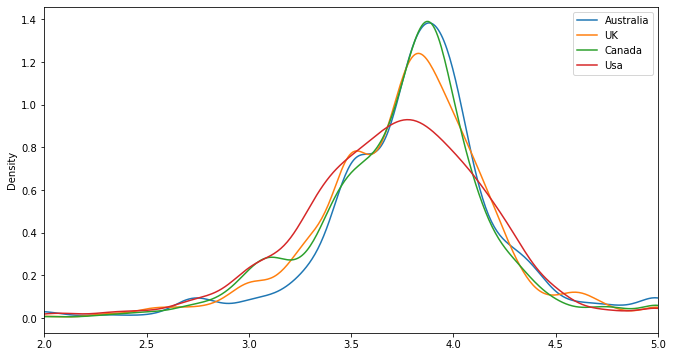

In [13]:
## KDE
rate_fig = plt.figure(figsize=(11,6))
data[data.country == 'AUSTRALIA']['rating'].plot.kde(label = 'Australia', legend = True)
data[data.country == 'United Kingdom']['rating'].plot.kde(label = 'UK', legend = True)
data[data.country == 'Canada']['rating'].plot.kde(label = 'Canada', legend = True)
data[data.country == 'USA']['rating'].plot.kde(label = 'Usa', legend = True)
plt.xlim((2, 5))
# rate_fig.label()


## STEP HISTOGRAM
# plt.figure(figsize=(8,6))
# data[data.country == 'AUSTRALIA']['rating'].plot.hist(histtype = 'step', label = 'Australia', legend = True)
# data[data.country == 'United Kingdom']['rating'].plot.hist(histtype = 'step', label = 'UK', legend = True)
# data[data.country == 'Canada']['rating'].plot.hist(histtype = 'step', label = 'Canada', legend = True)
# data[data.country == 'USA']['rating'].plot.hist(histtype = 'step', label = 'Usa', legend = True)
# plt.xlim((2, 5))

## MUTED COLOR HISTOGRAM
# plt.figure(figsize=(8,6))
# data[data.country == 'AUSTRALIA']['rating'].plot.hist(alpha=0.5, color='red', label = 'Australia', legend = True)
# data[data.country == 'United Kingdom']['rating'].plot.hist(alpha=0.5, color='green', label = 'UK', legend = True)
# data[data.country == 'Canada']['rating'].plot.hist(alpha=0.5, color='yellow', label = 'Canada', legend = True)
# data[data.country == 'USA']['rating'].plot.hist(alpha=0.5, color='blue', label = 'Usa', legend = True)
# plt.xlim((2, 5))


## SALARY RANGE FOR EACH COUNTRY

(array([0, 1, 2, 3]),
 [Text(0, 0, 'AUSTRALIA'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'USA'),
  Text(3, 0, 'United Kingdom')])

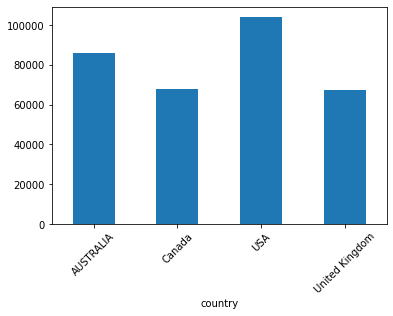

In [21]:

data.groupby('country')['average_salary_usd'].mean().plot.bar()
plt.xticks(rotation=45)

## TOP TEN COMPANIES IN EACH COUNTRY

In [15]:
company_df = data.groupby(by=['country', 'job_field', 'company_name']).size()
major_companies = pd.DataFrame(company_df.groupby(level=[0,1], group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5)))
major_companies = major_companies.rename(columns={0: 'number_of_offers'})
major_companies

number_of_offers
country        job_field      company_name                               
AUSTRALIA      data analyst   Macquarie Group Limited                  53
                              EY                                       37
                              Deloitte                                 25
                              Commonwealth Bank                        19
                              Westpac Group                            17
...                                                                   ...
United Kingdom ui ux designer Dyson                                    15
                              Salt Recruitment                         12
                              Client Server                            11
                              Skillsearch Limited                       8
                              JPMorgan Chase Bank, N.A.                 7

[120 rows x 1 columns]

In [16]:
country_of_interest = 'USA'
job_field_of_interest = 'software engineer'

request_mj_companies =major_companies.reset_index()[(major_companies.reset_index()['country'] == country_of_interest) & (major_companies.reset_index()['job_field'] == job_field_of_interest)]
px.bar(request_mj_companies,
        x='company_name', y='number_of_offers', 
        labels={
                'company_name': 'Name of Comany',
                'number_of_offers': 'Number of Job Listings'
        },
        title=f'Major hiring companies within {country_of_interest} in the {job_field_of_interest} field',
        template='simple_white')

## MOST POPULAR LOCATIONS

In [17]:
location_df = data.groupby(by=['country', 'job_field', 'clean_location']).size()
major_locations = pd.DataFrame(location_df.groupby(level=[0,1], group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5)))
major_locations = major_locations.rename(columns={0: 'number_of_offers'})
major_locations

number_of_offers
country        job_field      clean_location                  
AUSTRALIA      data analyst   sydney nsw                   213
                              remote                       141
                              melbourne vic                128
                              hybrid                        74
                              brisbane qld                  32
...                                                        ...
United Kingdom ui ux designer remote                       237
                              london                       202
                              hybrid                       159
                              manchester                    12
                              edinburgh                     11

[120 rows x 1 columns]

In [18]:
request_location_df = major_locations.reset_index()
request_mj_locations = request_location_df[(request_location_df['country'] == country_of_interest) & (request_location_df['job_field'] == job_field_of_interest) ]

px.bar(request_mj_locations,
        x='clean_location', y='number_of_offers', 
        title=f'Major hiring companies within {country_of_interest} in the {job_field_of_interest} field',
        template='simple_white')

In [30]:
request_mj_locs_no_rh = request_mj_locations[~request_mj_locations['clean_location'].isin(['hybrid', 'remote'])]
px.bar(request_mj_locs_no_rh,
        x='clean_location', y='number_of_offers', 
        title=f'Major hiring companies within {country_of_interest} in the {job_field_of_interest} field',
        template='simple_white')

## JOB TYPES

In [20]:
types_df = data.groupby(by=['country', 'job_field', 'job_type']).size()
major_types = pd.DataFrame(types_df.groupby(level=[0,1], group_keys=False).apply(lambda x: x.sort_values(ascending=False)))
major_types = major_types.rename(columns={0: 'number_of_offers'})
major_types

number_of_offers
country        job_field      job_type                    
AUSTRALIA      data analyst   full-time                302
                              permanent                180
                              contract                  71
                              part-time                 12
                              graduate                   7
...                                                    ...
United Kingdom ui ux designer contract                  13
                              part-time                  9
                              internship                 3
                              graduate                   2
                              freelance                  1

[124 rows x 1 columns]

In [21]:
request_mj_types = major_types.reset_index()[(major_types.reset_index()['country'] == country_of_interest) & (major_types.reset_index()['job_field'] == job_field_of_interest) ]
px.bar(request_mj_types,
        x='job_type', y='number_of_offers', 
        title=f'Major Job offer types within {country_of_interest} in the {job_field_of_interest} field',
        template='simple_white')

## RATING

In [22]:
rating_df = pd.DataFrame(data.groupby(by=['country', 'job_field'])['rating'].mean())
rating_df

rating
country        job_field                     
AUSTRALIA      data analyst          3.761157
               data scientist        3.859585
               marketing specialist  3.771880
               product manager       3.810264
               software engineer     3.826614
               ui ux designer        3.800000
Canada         data analyst          3.707633
               data scientist        3.770240
               marketing specialist  3.728988
               product manager       3.734150
               software engineer     3.785900
               ui ux designer        3.798140
USA            data analyst          3.678968
               data scientist        3.724306
               marketing specialist  3.645349
               product manager       3.713208
               software engineer     3.770000
               ui ux designer        3.688226
United Kingdom data analyst          3.699180
               data scientist        3.831287
               marketing specialist  3.757464
               product manager       3.748266
               software engineer     3.792747
               ui ux designer        3.719211

Text(0, 0.5, 'Count')

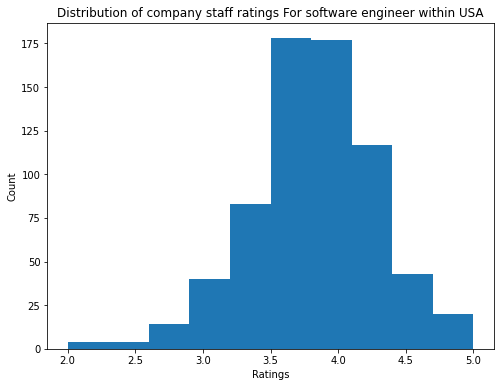

In [23]:
request_ratings = data[(data['country'] == country_of_interest) & (data['job_field'] == job_field_of_interest) ]
plt.figure(figsize=(8,6))
request_ratings['rating'].plot(kind='hist', title=f'Distribution of company staff ratings For {job_field_of_interest} within {country_of_interest}')
plt.xlabel("Ratings")
plt.ylabel("Count")

## SALARY

In [24]:
salary_request_df = pd.DataFrame(data.groupby(by=['country', 'job_field'])['average_salary_usd'].mean())
salary_request_df

average_salary_usd
country        job_field                               
AUSTRALIA      data analyst                93800.250625
               data scientist              71615.911084
               marketing specialist        75901.726986
               product manager            106764.356972
               software engineer           91527.601938
               ui ux designer              92691.707035
Canada         data analyst                67481.109393
               data scientist              83216.137283
               marketing specialist        48736.748631
               product manager             99273.434412
               software engineer           71296.935269
               ui ux designer              65927.841134
USA            data analyst                81156.202513
               data scientist             117729.901987
               marketing specialist        68741.817857
               product manager            133139.251220
               software engineer          119706.835321
               ui ux designer             113053.133929
United Kingdom data analyst                50342.513798
               data scientist              87105.602015
               marketing specialist        49211.538264
               product manager             79607.317982
               software engineer           69123.851702
               ui ux designer              72570.924314

Text(0, 0.5, 'Count')

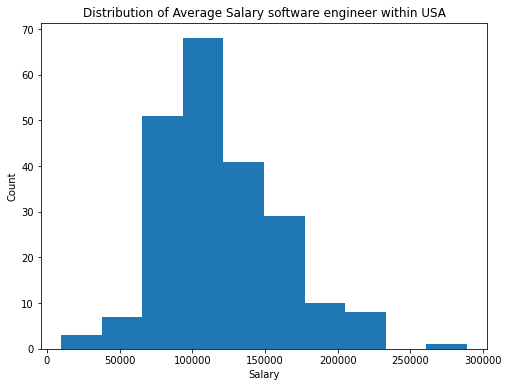

In [25]:
request_salary = data[(data['country'] == country_of_interest) & (data['job_field'] == job_field_of_interest) ]
plt.figure(figsize=(8,6))
request_salary['average_salary_usd'].plot(kind='hist', title=f'Distribution of Average Salary {job_field_of_interest} within {country_of_interest}')
plt.xlabel("Salary")
plt.ylabel("Count")

## TimeSeries Analysis

In [26]:
data['day_of_week'] = data['post_date'].dt.day_of_week

INVVESTIGATING FREQUENCY OF OFFER LISTING ON VARIOUS WEEKDAYS

NOTE THAT THE DATE ON POST LISTINGS POORLY REFLECT THE DATA

THIS IS BECAUSE OF POSTS DATED ON THE 09TH OF AUGUST WERE LISTED ON OR BEFORE SAID DATE(THIS WAS A LIMITATION FROM DATA EXTRACTION)

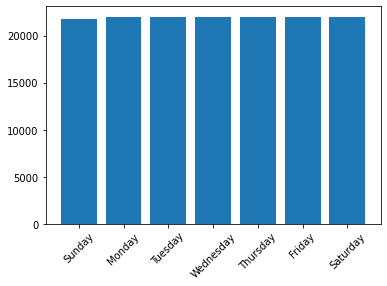

In [27]:
plt.bar(data['day_of_week'], data.index)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
                 rotation=45)
plt.xticks(np.arange(min(data['day_of_week']), max(data['day_of_week'])+1, 1.0))            ## SET XTICKS WITH INTTERVALS OF 1
plt.xlim()
plt.show()

MOST WEEKDAYS HAVE JOB LISTINGS UPLOADED IN EQUAL AMOUNTS 

WITH AN EXCEPTION OF SUNDAY WHICH IS SLIGHTLY REDUCED



## JOB DESCRIPTION

In [98]:
irrelevant_words = list(stopwords.words('english')) + list(punctuation)
irrelevant_words.append('…')
irrelevant_words.append('’')
irrelevant_words.append('...')
update_irrelevant_words = ['software', 'development', 'product', 'manager', 'science', 
                           'ui', 'ux', 'products', 'using', 'including', 'engineer', 
                           'engineering', 'teams', 'analysis', 'marketing', 'specialist',
                           'designer', 'designers', 'digital', 'de', 'et', 'closely',
                           'experiences', 'across']
for word in update_irrelevant_words:
    irrelevant_words.append(word)

In [62]:
def slice_dataframe(data: pd.DataFrame, **kwargs) -> pd.DataFrame:
    """ return subset of dataframe 
    Args:
        data (pd.DataFrame): dataframe

    Kwargs:
        country (str): country to subset dataframe on if provided
        job_field (str): job_field to subset dataframe on if provided


    Returns:
        temp_data: subset of dataframe
    """
    country = kwargs.get('country', None)
    field = kwargs.get('job_field', None)
    if country is not None and field is not None:
        temp_data = data[(data['country'] == country) & (data['job_field'] == field)].copy()
    if country is not None:
        temp_data = data[data['country'] == country].copy()
    if field is not None:
        temp_data = data[data['job_field'] == field].copy()
    return temp_data

In [45]:
def extract_keyword_degree(data: pd.DataFrame, nr_of_words:int, subset=False,  **kwargs) -> dict:
    """ extract (nr_of_words) most frequent words from job_description column of dataframe

    Args:
        data (pd.DataFrame): dataframe
        nr_of_words (int): Number of Words to return

    Returns:
        Word_frequency_dictionary (dict): dictionary containing most frequent words and their frequency
    """
    temp_data = data.copy()
    r = Rake()
    r.extract_keywords_from_sentences(temp_data['job_description'].to_list())
    words_freq = r.get_word_degrees()
    sorted_freq = dict(sorted(words_freq.items(), key=lambda item: item[1], reverse=True))
    for word in irrelevant_words:
        if word in sorted_freq:
            del sorted_freq[word]
    return dict(itertools.islice(sorted_freq.items(), 0 ,nr_of_words))

Text(0, 0.5, 'Frequency')

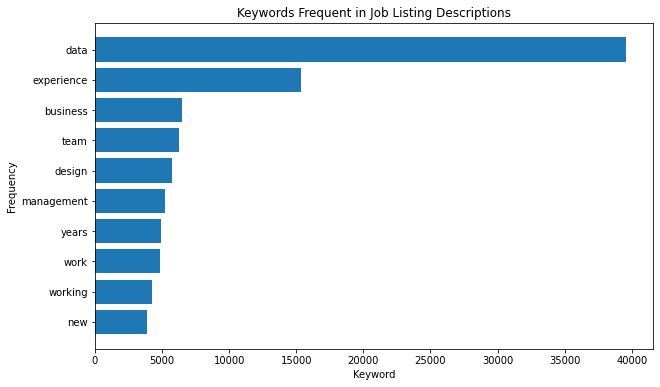

In [101]:
plt.figure(figsize=(10,6))
freq_words_general = extract_keyword_degree(data, 10)
Word, Degree_of_importance = zip(*sorted(freq_words_general.items(), key=lambda item: item[1],))
plt.barh(Word, Degree_of_importance)
plt.title('Keywords Frequent in Job Listing Descriptions')
plt.xlabel('Keyword')
plt.ylabel('Frequency')

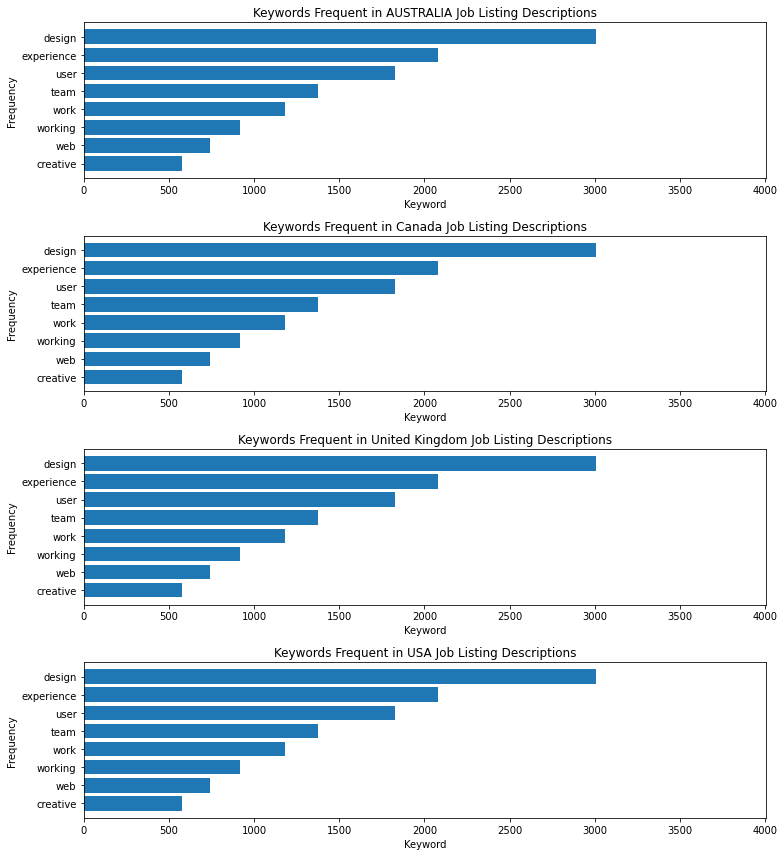

In [100]:
plt.figure(figsize=(11,12))
for i, country in enumerate(data['country'].unique()):
    temp_data = slice_dataframe(data, country=country, job_field='ui ux designer')
    freq_words_general = extract_keyword_degree(temp_data, 8)
    Word, Degree_of_importance = zip(*sorted(freq_words_general.items(), key=lambda item: item[1],))
    plot_max = max(Degree_of_importance) + 1000
    plt.subplot(4, 1, i+1)
    plt.barh(Word, Degree_of_importance)
    plt.title(f'Keywords Frequent in {country} Job Listing Descriptions')
    plt.xlabel('Keyword')
    plt.ylabel('Frequency')
    plt.xlim(left=0, right=plot_max)
    plt.tight_layout()

In [29]:
data.to_csv('../data/eda_cleaned.csv')